In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import sympy
# import h3

# import duckdb
# db = duckdb.connect()
# db.execute("INSTALL spatial")
# db.execute("INSTALL httpfs")
# db.execute("""
# LOAD spatial;
# LOAD httpfs;
# SET s3_region='us-west-2';
# """)

## Admins

In [2]:
### 2010 California Census Tracts
tracts_us = pd.DataFrame()
for i in range(60):#range(2):
    state = str(i).zfill(2)
    try:
        url = 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_'+state+'_tract10.zip'
        tracts = gpd.read_file(url)
        tracts_us = pd.concat([tracts_us, tracts])
        print(state)
    except:
        continue
tracts_us.head()

01
02
04
05
06
08
09
10
11
12
13
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
44
45
46
47
48
49
50
51
53
54
55
56


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,01,005,950300,01005950300,9503,Census Tract 9503,G5020,S,352811329,499970,+31.7908933,-085.5670514,"POLYGON ((-85.52744 31.86650, -85.52753 31.866..."
1,01,005,950900,01005950900,9509,Census Tract 9509,G5020,S,16201446,8339342,+31.8467221,-085.1462332,"POLYGON ((-85.16412 31.83059, -85.16419 31.830..."
2,01,005,950800,01005950800,9508,Census Tract 9508,G5020,S,14630162,380622,+31.9206930,-085.1760317,"POLYGON ((-85.14872 31.90933, -85.14663 31.908..."
3,01,005,950700,01005950700,9507,Census Tract 9507,G5020,S,127200997,112809,+31.9440855,-085.2620842,"POLYGON ((-85.14578 31.89149, -85.14578 31.891..."
4,01,005,950600,01005950600,9506,Census Tract 9506,G5020,S,101697268,1101261,+31.8783526,-085.2729215,"POLYGON ((-85.14572 31.89011, -85.14572 31.889..."


## Places

In [3]:
# places = gpd.read_file('OvertureData/places_sf.geojsonseq').to_crs(tracts.crs)
# places

In [4]:
# Transform WKB to geometry
places = pd.read_csv('combined_places_us.csv')
places['WKB']=places['geometry'].apply(lambda x: x[2:])
geometry = gpd.GeoSeries.from_wkb(places['WKB'], crs=tracts_us.crs)

places_g = gpd.GeoDataFrame(places[['id', 'updatetime', 'version', 'names', 'cat_main', 'cat_alt',
                                    'confidence', 'websites', 'address']], geometry=geometry)

places_g

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,geometry
0,tmp_500EB741CECBFF561AE1B94216F61766,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""7-Eleven"",""language"":""en""}]}",NaN,NaN,0.600000,NaN,"[{""locality"":""Wheaton"",""postcode"":""60187"",""fre...",POINT (-88.11122 41.86390)
1,tmp_DA8054A688D44D9E0EBE644B4D7FFA47,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cretex Specialty Products...",structural_engineer,"[""professional_services"",""shopping""]",0.606087,"[""http://www.cretexseals.com""]","[{""postcode"":""53188"",""freeform"":""N26W23800 Com...",POINT (-88.22075 43.06641)
2,tmp_BA9A84ABF48346A69ED91148D4C27D99,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Bao Mi"",""language"":""local...",restaurant,NaN,0.980592,NaN,"[{""locality"":""New Orleans"",""postcode"":""70112-2...",POINT (-90.08294 29.95774)
3,tmp_711963EE7AEC75283BE841261ACB8C2C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Chevron Station Russellvi...",NaN,NaN,0.600000,NaN,"[{""locality"":""Russellville"",""postcode"":""35654""...",POINT (-87.67518 34.59147)
4,tmp_F06F089E8728025E4177EFBB3AF322A7,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Mobil"",""language"":""local""}]}",gas_station,"[""convenience_store"",""laboratory_testing""]",0.978300,"[""http://www.mobil.com""]","[{""locality"":""Sturgeon Bay"",""postcode"":""54235-...",POINT (-87.36616 44.84507)
...,...,...,...,...,...,...,...,...,...,...
12792522,tmp_4E63260021AAA79A95CC1A605C8C950C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cook's Body & Mechanical""...",convenience_store,"[""automotive"",""automotive_repair""]",0.774474,"[""http://www.cooks1stopshop.com""]","[{""locality"":""St Paul"",""postcode"":""55109-2127""...",POINT (-93.02488 45.01250)
12792523,tmp_8640AFFBC0A4F7701C6F39F9ADC5D585,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Dick Smith Park"",""languag...",park,"[""public_plaza"",""topic_concert_venue""]",0.968883,"[""https://www.dicksmith.com.au""]","[{""postcode"":""64844"",""country"":""US""}]",POINT (-94.25566 36.91716)
12792524,tmp_7444C2F2F44683A875C7FCF82F66FAF6,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""C&C Metal Products LLC"",""...",NaN,NaN,0.758897,NaN,"[{""locality"":""Saint Amant"",""postcode"":""70774"",...",POINT (-90.85973 30.22403)
12792525,tmp_14B3B04000AE44C1F149FB58B1433128,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Leger's Cabinet Shop"",""la...",countertop_installation,"[""carpenter"",""construction_services""]",0.621023,"[""http://legerscabinets.com""]","[{""locality"":""Lafayette"",""postcode"":""70506-922...",POINT (-92.11770 30.14185)


In [5]:
### Split alternative category column into 2 and clean them
places_g[['cat_alt1','cat_alt2']] = places_g.cat_alt.str.split('","', expand=True)
places_g['cat_alt1'] = places_g['cat_alt1'].astype(str).str.lstrip('["')#replace('[', '')
places_g['cat_alt2'] = places_g['cat_alt2'].astype(str).str.rstrip('"]')#replace('[', '')

In [6]:
# all_names = places_g['cat_main'].unique().tolist() + places_g['cat_alt1'].unique().tolist() + places_g['cat_alt2'].unique().tolist()
# pd.DataFrame(all_names).to_csv('./OvertureData/places_cat_more.csv')

In [7]:
# lst_sf = list(gpd.read_file('OvertureData/places_sf.geojsonseq').cat_main.unique())
# lst_us = list(places_g.cat_main.unique())
# main_lst = np.setdiff1d(lst_us,lst_sf)
# main_lst
# pd.DataFrame({'category':main_lst}).to_csv('./OvertureData/places_notSF.csv')

In [8]:
# df = places.groupby('cat_main').agg({'id':'count','confidence':'median'})
# df['global_sig'] = np.where(df['confidence']>=places.confidence.median(), True, False)
# # df.to_csv('./OvertureData/places_cat.csv')

In [9]:
place_cat=pd.read_csv('places_cat.csv')
places_all=places_g.merge(place_cat[['cat_main','category']],on='cat_main', 
                            how='left').rename(columns={'category':'category_m'})
places_all=places_all.merge(place_cat[['cat_main','category']],left_on='cat_alt1',right_on='cat_main',
                            how='left').rename(columns={'category':'category_1'})
places_all=places_all.merge(place_cat[['cat_main','category']],left_on='cat_alt2',right_on='cat_main',
                            how='left').rename(columns={'category':'category_2'})

# dic = place_cat.set_index('cat_main')['category'].to_dict()
# places_all["cat_main"].replace(dic, inplace=True)
# places_all["cat_alt1"].replace(dic, inplace=True)
# places_all["cat_alt2"].replace(dic, inplace=True)

In [10]:
places_all.drop(columns=['cat_main_x','cat_main_y'])#.to_csv('./OvertureData/places_all.csv')

,id,updatetime,version,names,cat_alt,confidence,websites,address,geometry,cat_alt1,cat_alt2,category_m,category_1,cat_main,category_2
0,tmp_500EB741CECBFF561AE1B94216F61766,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""7-Eleven"",""language"":""en""}]}",NaN,0.600000,NaN,"[{""locality"":""Wheaton"",""postcode"":""60187"",""fre...",POINT (-88.11122 41.86390),nan,nan,NaN,NaN,NaN,NaN
1,tmp_DA8054A688D44D9E0EBE644B4D7FFA47,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cretex Specialty Products...","[""professional_services"",""shopping""]",0.606087,"[""http://www.cretexseals.com""]","[{""postcode"":""53188"",""freeform"":""N26W23800 Com...",POINT (-88.22075 43.06641),professional_services,shopping,commercial,service,shopping,commercial
2,tmp_BA9A84ABF48346A69ED91148D4C27D99,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Bao Mi"",""language"":""local...",NaN,0.980592,NaN,"[{""locality"":""New Orleans"",""postcode"":""70112-2...",POINT (-90.08294 29.95774),nan,nan,commercial,NaN,NaN,NaN
3,tmp_711963EE7AEC75283BE841261ACB8C2C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Chevron Station Russellvi...",NaN,0.600000,NaN,"[{""locality"":""Russellville"",""postcode"":""35654""...",POINT (-87.67518 34.59147),nan,nan,NaN,NaN,NaN,NaN
4,tmp_F06F089E8728025E4177EFBB3AF322A7,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Mobil"",""language"":""local""}]}","[""convenience_store"",""laboratory_testing""]",0.978300,"[""http://www.mobil.com""]","[{""locality"":""Sturgeon Bay"",""postcode"":""54235-...",POINT (-87.36616 44.84507),convenience_store,laboratory_testing,commercial,commercial,laboratory_testing,service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792522,tmp_4E63260021AAA79A95CC1A605C8C950C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cook's Body & Mechanical""...","[""automotive"",""automotive_repair""]",0.774474,"[""http://www.cooks1stopshop.com""]","[{""locality"":""St Paul"",""postcode"":""55109-2127""...",POINT (-93.02488 45.01250),automotive,automotive_repair,commercial,commercial,automotive_repair,commercial
12792523,tmp_8640AFFBC0A4F7701C6F39F9ADC5D585,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Dick Smith Park"",""languag...","[""public_plaza"",""topic_concert_venue""]",0.968883,"[""https://www.dicksmith.com.au""]","[{""postcode"":""64844"",""country"":""US""}]",POINT (-94.25566 36.91716),public_plaza,topic_concert_venue,public space,commercial,topic_concert_venue,entertainment
12792524,tmp_7444C2F2F44683A875C7FCF82F66FAF6,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""C&C Metal Products LLC"",""...",NaN,0.758897,NaN,"[{""locality"":""Saint Amant"",""postcode"":""70774"",...",POINT (-90.85973 30.22403),nan,nan,NaN,NaN,NaN,NaN
12792525,tmp_14B3B04000AE44C1F149FB58B1433128,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Leger's Cabinet Shop"",""la...","[""carpenter"",""construction_services""]",0.621023,"[""http://legerscabinets.com""]","[{""locality"":""Lafayette"",""postcode"":""70506-922...",POINT (-92.11770 30.14185),carpenter,construction_services,service,commercial,construction_services,service


In [11]:
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [12]:
places_all.groupby('category_m').agg({'id':'count','confidence':'median'}).sort_values(by='confidence')['id'].sum()

10325769

In [13]:
ceshi = places_all.groupby('category_m').agg({'id':'count','confidence':'median'}).sort_values(by=['confidence'],ascending=False)
ceshi

,id,confidence
category_m,,
residential,80229,0.938582
religious,517305,0.938493
medical,835275,0.937154
commercial,4931724,0.920414
education,465375,0.894332
public space,362279,0.814309
civic,828339,0.813848
entertainment,132666,0.763700
military,6375,0.759080


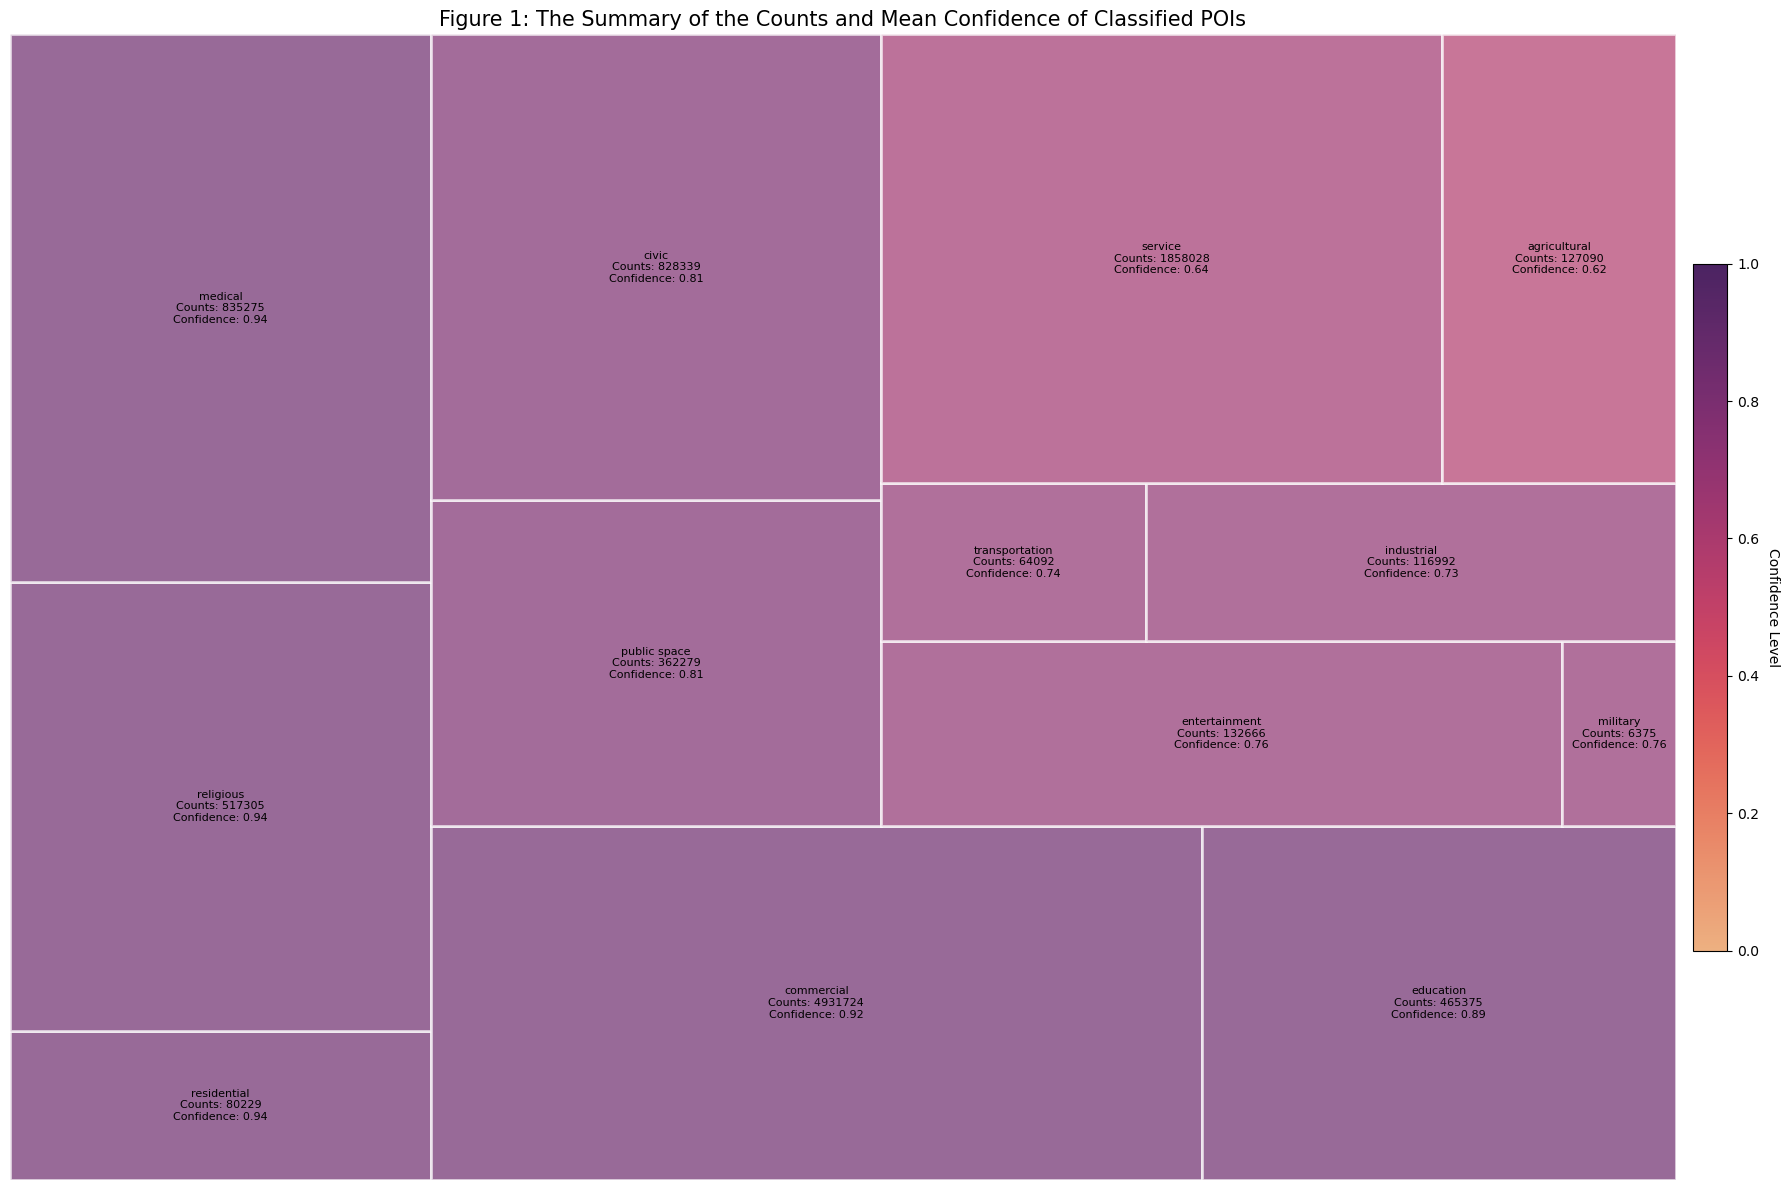

In [14]:
import squarify

ceshi['normalized_id'] = ceshi['id'].rank(pct=True)

colors = sns.color_palette("flare", len(ceshi.index.unique()))
confidence_sorted = ceshi['confidence'].sort_values().unique()
color_mapping = {conf: colors[int(np.round(conf * (len(colors) - 1)))] for conf in confidence_sorted}
mapped_colors = ceshi['confidence'].map(color_mapping).tolist()

plt.figure(figsize=(18, 12))
ax = plt.gca() 
label = ceshi.index.astype(str) + '\n' + 'Counts: ' + ceshi['id'].round(2).astype(str)+ '\n' + 'Confidence: ' + ceshi['confidence'].round(2).astype(str)
rects = squarify.plot(sizes=ceshi['normalized_id'], label=label, color=mapped_colors, edgecolor="white", linewidth=2, alpha=0.7, text_kwargs={'fontsize': 8})
plt.axis("off")
plt.title('Figure 1: The Summary of the Counts and Mean Confidence of Classified POIs', fontsize=15) 

sm = plt.cm.ScalarMappable(cmap='flare', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.01) 
cbar.set_label('Confidence Level', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


In [15]:
places_all['lon'] = places_all.geometry.x  
places_all['lat'] = places_all.geometry.y
places_all

,id,updatetime,version,names,cat_main_x,cat_alt,confidence,websites,address,geometry,cat_alt1,cat_alt2,category_m,cat_main_y,category_1,cat_main,category_2,lon,lat
0,tmp_500EB741CECBFF561AE1B94216F61766,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""7-Eleven"",""language"":""en""}]}",NaN,NaN,0.600000,NaN,"[{""locality"":""Wheaton"",""postcode"":""60187"",""fre...",POINT (-88.11122 41.86390),nan,nan,NaN,NaN,NaN,NaN,NaN,-88.111223,41.863899
1,tmp_DA8054A688D44D9E0EBE644B4D7FFA47,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cretex Specialty Products...",structural_engineer,"[""professional_services"",""shopping""]",0.606087,"[""http://www.cretexseals.com""]","[{""postcode"":""53188"",""freeform"":""N26W23800 Com...",POINT (-88.22075 43.06641),professional_services,shopping,commercial,professional_services,service,shopping,commercial,-88.220751,43.066411
2,tmp_BA9A84ABF48346A69ED91148D4C27D99,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Bao Mi"",""language"":""local...",restaurant,NaN,0.980592,NaN,"[{""locality"":""New Orleans"",""postcode"":""70112-2...",POINT (-90.08294 29.95774),nan,nan,commercial,NaN,NaN,NaN,NaN,-90.082941,29.957742
3,tmp_711963EE7AEC75283BE841261ACB8C2C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Chevron Station Russellvi...",NaN,NaN,0.600000,NaN,"[{""locality"":""Russellville"",""postcode"":""35654""...",POINT (-87.67518 34.59147),nan,nan,NaN,NaN,NaN,NaN,NaN,-87.675178,34.591467
4,tmp_F06F089E8728025E4177EFBB3AF322A7,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Mobil"",""language"":""local""}]}",gas_station,"[""convenience_store"",""laboratory_testing""]",0.978300,"[""http://www.mobil.com""]","[{""locality"":""Sturgeon Bay"",""postcode"":""54235-...",POINT (-87.36616 44.84507),convenience_store,laboratory_testing,commercial,convenience_store,commercial,laboratory_testing,service,-87.366155,44.845066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792522,tmp_4E63260021AAA79A95CC1A605C8C950C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cook's Body & Mechanical""...",convenience_store,"[""automotive"",""automotive_repair""]",0.774474,"[""http://www.cooks1stopshop.com""]","[{""locality"":""St Paul"",""postcode"":""55109-2127""...",POINT (-93.02488 45.01250),automotive,automotive_repair,commercial,automotive,commercial,automotive_repair,commercial,-93.024879,45.012503
12792523,tmp_8640AFFBC0A4F7701C6F39F9ADC5D585,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Dick Smith Park"",""languag...",park,"[""public_plaza"",""topic_concert_venue""]",0.968883,"[""https://www.dicksmith.com.au""]","[{""postcode"":""64844"",""country"":""US""}]",POINT (-94.25566 36.91716),public_plaza,topic_concert_venue,public space,public_plaza,commercial,topic_concert_venue,entertainment,-94.255660,36.917164
12792524,tmp_7444C2F2F44683A875C7FCF82F66FAF6,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""C&C Metal Products LLC"",""...",NaN,NaN,0.758897,NaN,"[{""locality"":""Saint Amant"",""postcode"":""70774"",...",POINT (-90.85973 30.22403),nan,nan,NaN,NaN,NaN,NaN,NaN,-90.859734,30.224025
12792525,tmp_14B3B04000AE44C1F149FB58B1433128,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Leger's Cabinet Shop"",""la...",countertop_installation,"[""carpenter"",""construction_services""]",0.621023,"[""http://legerscabinets.com""]","[{""locality"":""Lafayette"",""postcode"":""70506-922...",POINT (-92.11770 30.14185),carpenter,construction_services,service,carpenter,commercial,construction_services,service,-92.117700,30.141850


In [16]:
# # set seaborn whitegrid theme
# sns.set(style="whitegrid")

# ax=sns.kdeplot(data=places_all,x="confidence",hue="category",cut=0,fill=True,
#                common_norm=False,alpha=0.3)
# sns.move_legend(ax,"center left")
# plt.show()

In [17]:
print('% of places with main categories: ', 1-sum(places.cat_main.isnull())/places.shape[0])

% of places with main categories:  0.8071719528127632


### Summary at the Census Tract Level

In [18]:
acs=pd.read_csv('acs_2021_tract_all.csv',dtype={'GEOID':str})

def acs_to10(acs):
    # Read cross walk data
    census_crosswalk=pd.read_csv("https://www2.census.gov/geo/docs/maps-data/data/rel2020/tract/tab20_tract20_tract10_natl.txt",
                             sep='|',lineterminator='\n',dtype={'GEOID_TRACT_10':str,'GEOID_TRACT_20':str})
    cw = census_crosswalk[['GEOID_TRACT_20','GEOID_TRACT_10','AREALAND_TRACT_20',
                           'AREAWATER_TRACT_20','AREALAND_PART','AREAWATER_PART']]

    # Merge census data with cbg crosswalk
    census_2020_cw = acs.merge(cw,left_on='GEOID',right_on='GEOID_TRACT_20',how='left')
    
    # Calculate the projected population
    census_2020_cw['pct_area_2020']=(census_2020_cw['AREALAND_PART']+census_2020_cw['AREAWATER_PART'])/(census_2020_cw['AREALAND_TRACT_20']+census_2020_cw['AREAWATER_TRACT_20'])
    census_2020_cw['B01001_001'] = round(census_2020_cw['B01001_001']*census_2020_cw['pct_area_2020'],2)
    census_2020_to10=census_2020_cw.groupby('GEOID_TRACT_10').agg(sum).reset_index().rename(columns={'GEOID_TRACT_10':'GEOID10','B01001_001':'pop'})
    census_2020_to10=census_2020_to10[['GEOID10','pop']]

    return census_2020_to10

In [19]:
acs_10 = acs_to10(acs)
acs_10

,GEOID10,pop
0,01001020100,1790.36
1,01001020200,2010.88
2,01001020300,3577.00
3,01001020400,3802.00
4,01001020500,10883.00
...,...,...
73052,56043000200,3249.87
73053,56043000301,2208.00
73054,56043000302,2310.13
73055,56045951100,3466.30


In [20]:
# ct=gpd.sjoin(tracts_us, places_all, how='left',
#              predicate='intersects').groupby(['GEOID10',
#                                               'category_m']).agg({'id':'count'}).reset_index().pivot(index='GEOID10',
#                                                                                                    columns='category_m',
#                                                                                                    values='id').fillna(0)
# ct=tracts_us.merge(ct, on='GEOID10', how='left')
# ct

## Clustering
### Elbow Method to determine K
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [21]:
# places_all = pd.read_csv('./OvertureData/places_all.csv')
# places_all = gpd.GeoDataFrame(places_all, crs=ct.crs, geometry=places_all['geometry'])
# places_all

In [22]:
ct = tracts_us.loc[(tracts_us['STATEFP10']!='02')&(tracts_us['STATEFP10']!='15')]
# ct.to_file('./OvertureData/ct.shp')
# ct = gpd.read_file('./OvertureData/ct.shp')
ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 72539 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   72539 non-null  object  
 1   COUNTYFP10  72539 non-null  object  
 2   TRACTCE10   72539 non-null  object  
 3   GEOID10     72539 non-null  object  
 4   NAME10      72539 non-null  object  
 5   NAMELSAD10  72539 non-null  object  
 6   MTFCC10     72539 non-null  object  
 7   FUNCSTAT10  72539 non-null  object  
 8   ALAND10     72539 non-null  int64   
 9   AWATER10    72539 non-null  int64   
 10  INTPTLAT10  72539 non-null  object  
 11  INTPTLON10  72539 non-null  object  
 12  geometry    72539 non-null  geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 7.7+ MB


In [23]:
ct_m=gpd.sjoin(ct[['GEOID10','geometry']], places_all[['id','category_m','geometry']], how='left',
               predicate='intersects').groupby(['GEOID10',
                                                'category_m']).agg({'id':'count'}).reset_index().pivot(index='GEOID10',
                                                                                                       columns='category_m',
                                                                                                       values='id').fillna(0)


ct_1=gpd.sjoin(ct[['GEOID10','geometry']], places_all[['id','category_1','geometry']], how='left',
               predicate='intersects').groupby(['GEOID10',
                                                'category_1']).agg({'id':'count'}).reset_index().pivot(index='GEOID10',
                                                                                                       columns='category_1',
                                                                                                       values='id').fillna(0)

ct_2=gpd.sjoin(ct[['GEOID10','geometry']], places_all[['id','category_2','geometry']], how='left',
               predicate='intersects').groupby(['GEOID10',
                                                'category_2']).agg({'id':'count'}).reset_index().pivot(index='GEOID10',
                                                                                                       columns='category_2',
                                                                                                       values='id').fillna(0)

In [24]:
ct_alt = ct_1.add(ct_2).add(ct_m).reset_index()
ct_alt = ct_alt.merge(ct[['ALAND10','GEOID10','geometry']], on = 'GEOID10')
ct_alt = gpd.GeoDataFrame(ct_alt, geometry = ct_alt['geometry'], crs = ct.crs)
ct_alt = ct_alt.merge(acs_10[['pop','GEOID10']], how = 'left', on = 'GEOID10')

### Add by-area density columns
for column in ct_alt.columns[1:14]:
    ct_alt[column+'_den']=np.where(ct_alt['ALAND10']!=0, ct_alt[column]/ct_alt['ALAND10']*1000000, 0) # per sq m

### Add by-population density
for column in ct_alt.columns[1:14]:
    ct_alt[column+'_den_p']=np.where(ct_alt['pop']!=0, ct_alt[column]/ct_alt['pop']*1000, 0) # facilities per 1k people
ct_alt

,GEOID10,agricultural,civic,commercial,education,entertainment,industrial,medical,military,public space,...,education_den_p,entertainment_den_p,industrial_den_p,medical_den_p,military_den_p,public space_den_p,religious_den_p,residential_den_p,service_den_p,transportation_den_p
0,01001020100,1.0,13.0,21.0,9.0,5.0,2.0,3.0,0.0,4.0,...,5.026922,2.792734,1.117094,1.675641,0.000000,2.234188,8.378203,0.000000,13.405125,0.000000
1,01001020200,0.0,63.0,157.0,18.0,14.0,1.0,24.0,1.0,9.0,...,8.951305,6.962126,0.497295,11.935073,0.497295,4.475652,18.897199,0.000000,34.313335,0.497295
2,01001020300,1.0,13.0,105.0,5.0,1.0,0.0,35.0,0.0,1.0,...,1.397819,0.279564,0.000000,9.784736,0.000000,0.279564,8.666480,1.397819,12.300811,0.000000
3,01001020400,2.0,10.0,118.0,10.0,1.0,2.0,34.0,0.0,3.0,...,2.630195,0.263019,0.526039,8.942662,0.000000,0.789058,5.786428,0.526039,20.515518,0.000000
4,01001020500,1.0,46.0,397.0,19.0,2.0,4.0,174.0,3.0,5.0,...,1.745842,0.183773,0.367546,15.988239,0.275659,0.459432,5.053754,0.643205,16.447671,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72451,56043000200,16.0,18.0,109.0,19.0,12.0,3.0,10.0,0.0,24.0,...,5.846388,3.692455,0.923114,3.077046,0.000000,7.384911,5.846388,0.615409,12.308185,1.846228
72452,56043000301,1.0,35.0,228.0,22.0,4.0,5.0,31.0,0.0,4.0,...,9.963768,1.811594,2.264493,14.039855,0.000000,1.811594,6.793478,0.452899,37.590580,0.452899
72453,56043000302,3.0,20.0,87.0,13.0,3.0,7.0,16.0,0.0,4.0,...,5.627389,1.298628,3.030133,6.926017,0.000000,1.731504,13.852034,0.865752,14.717786,0.865752
72454,56045951100,13.0,18.0,69.0,13.0,4.0,3.0,7.0,0.0,6.0,...,3.750397,1.153968,0.865476,2.019444,0.000000,1.730952,6.058333,0.000000,5.769841,0.288492


In [25]:
### Calculate richness
def richness(row):
    count = 0
    for column in ct_alt.columns[1:14]:#ct.columns[13:26]:
        if row[column] > 0:
            count += 1
    return count

### Calculate Shannon Entropy
#     ct['places_sum']=ct.iloc[:,13:26].sum(axis=1)
def entropy(row):
    summation = 0
    for column in ct_alt.columns[1:14]:#ct.columns[13:26]:
        if row['places_sum'] == 0:
            p = 1
        else: 
            p = row[column]/row['places_sum']
        if p == 0:
            p_lnp = 0
        else:
            p_lnp = p*(np.log(p))
        summation += p_lnp
    return np.exp(summation)

### Calculate Simpson Index
def simpson(row):
    summation = 0
    for column in ct_alt.columns[1:14]:#ct.columns[13:26]:
        if row['places_sum'] == 0:
            p = 1
        else: 
            p = row[column]/row['places_sum']
        summation += p**2
    return 1/summation

ct_alt['places_sum']=ct_alt.iloc[:,1:14].sum(axis=1)
ct_alt['richness']=ct_alt.apply(lambda row: richness(row), axis = 1)
ct_alt['entropy']=ct_alt.apply(lambda row: entropy(row), axis = 1)
ct_alt['simpson']=ct_alt.apply(lambda row: simpson(row), axis = 1)
ct_alt

,GEOID10,agricultural,civic,commercial,education,entertainment,industrial,medical,military,public space,...,military_den_p,public space_den_p,religious_den_p,residential_den_p,service_den_p,transportation_den_p,places_sum,richness,entropy,simpson
0,01001020100,1.0,13.0,21.0,9.0,5.0,2.0,3.0,0.0,4.0,...,0.000000,2.234188,8.378203,0.000000,13.405125,0.000000,97.0,10,0.138834,6.082094
1,01001020200,0.0,63.0,157.0,18.0,14.0,1.0,24.0,1.0,9.0,...,0.497295,4.475652,18.897199,0.000000,34.313335,0.497295,395.0,11,0.173704,4.333667
2,01001020300,1.0,13.0,105.0,5.0,1.0,0.0,35.0,0.0,1.0,...,0.000000,0.279564,8.666480,1.397819,12.300811,0.000000,241.0,10,0.201281,3.779101
3,01001020400,2.0,10.0,118.0,10.0,1.0,2.0,34.0,0.0,3.0,...,0.000000,0.789058,5.786428,0.526039,20.515518,0.000000,282.0,11,0.205036,3.636214
4,01001020500,1.0,46.0,397.0,19.0,2.0,4.0,174.0,3.0,5.0,...,0.275659,0.459432,5.053754,0.643205,16.447671,0.000000,892.0,12,0.214407,3.527943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72451,56043000200,16.0,18.0,109.0,19.0,12.0,3.0,10.0,0.0,24.0,...,0.000000,7.384911,5.846388,0.615409,12.308185,1.846228,278.0,12,0.136932,4.937644
72452,56043000301,1.0,35.0,228.0,22.0,4.0,5.0,31.0,0.0,4.0,...,0.000000,1.811594,6.793478,0.452899,37.590580,0.452899,430.0,12,0.223587,2.990554
72453,56043000302,3.0,20.0,87.0,13.0,3.0,7.0,16.0,0.0,4.0,...,0.000000,1.731504,13.852034,0.865752,14.717786,0.865752,223.0,12,0.151857,4.662822
72454,56045951100,13.0,18.0,69.0,13.0,4.0,3.0,7.0,0.0,6.0,...,0.000000,1.730952,6.058333,0.000000,5.769841,0.288492,175.0,11,0.146686,4.803922


In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy import stats

# X = ct.iloc[:,13:57].fillna(0)
X = pd.DataFrame(ct_alt.drop(columns=['geometry','GEOID10'])).fillna(0)
X = X[(np.abs(stats.zscore(X))<7).all(axis=1)]

In [27]:
X.shape

(69489, 45)

In [28]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0]
    mapping2[k] = kmeanModel.inertia_

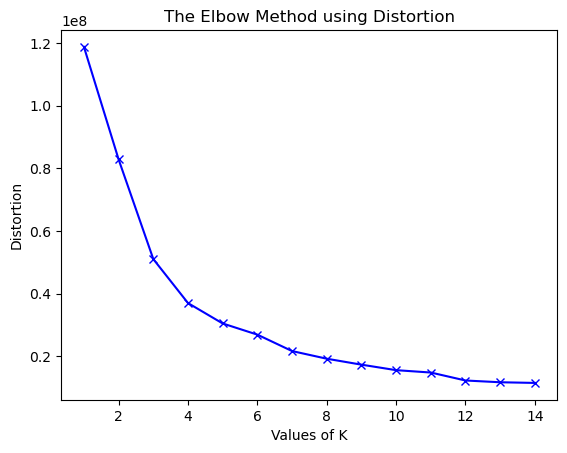

In [29]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

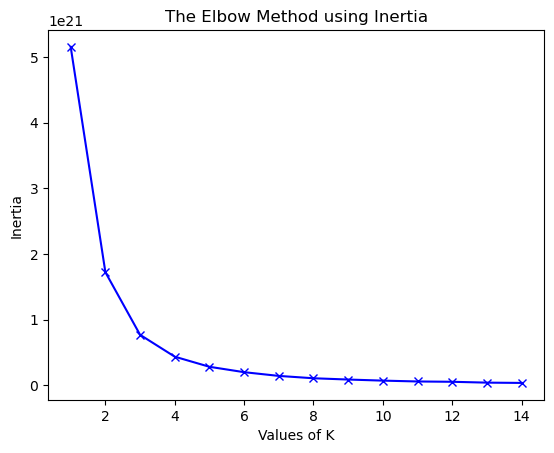

In [30]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### K-Means

In [31]:
model = KMeans(n_clusters=10, random_state=10000) #
places_kmeans = model.fit(X)

X['cluster']=places_kmeans.labels_.tolist()
X.groupby('cluster')['richness'].count()

cluster
0    54144
1      241
2      674
3      231
4     1157
5     3834
6      130
7     2216
8      383
9     6479
Name: richness, dtype: int64

<Axes: >

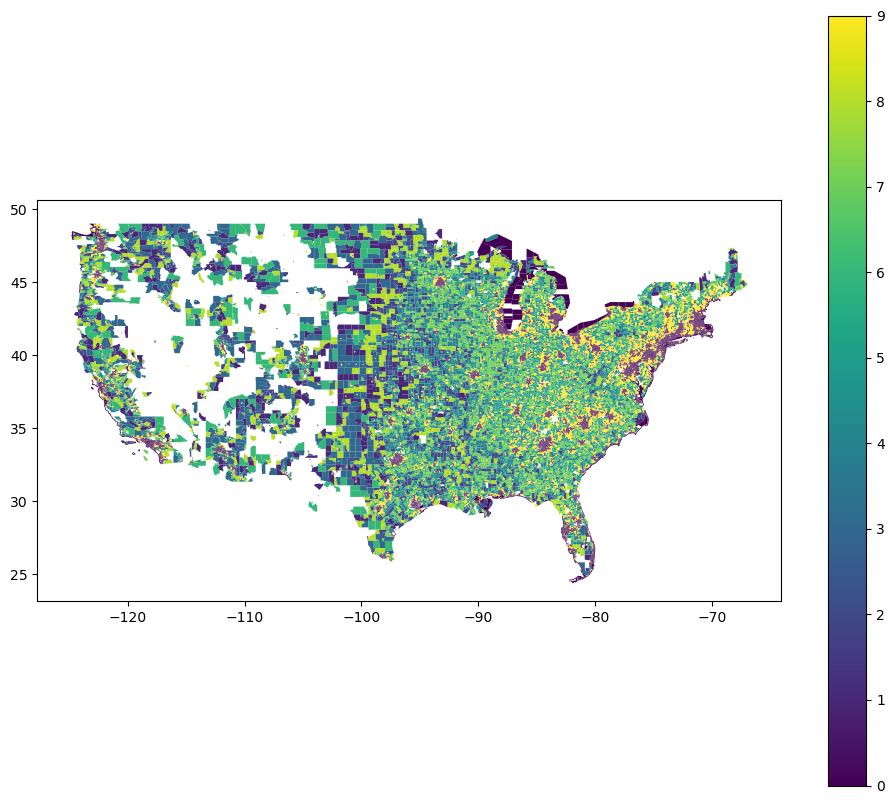

In [32]:
ct_alt[['geometry']].merge(X, left_index = True, right_index = True, 
                           how = 'left').plot(column='cluster', figsize=(12, 10), legend = True)

In [33]:
ct_alt = ct_alt.merge(X[['cluster']],left_index = True, right_index = True, how = 'left')

# Fill NaN values in 'cluster' column with 10
ct_alt['cluster'].fillna(10, inplace=True)
# Convert 'cluster' column to object type
# ct_alt['cluster'] = ct_alt['cluster'].astype(object)

<Axes: >

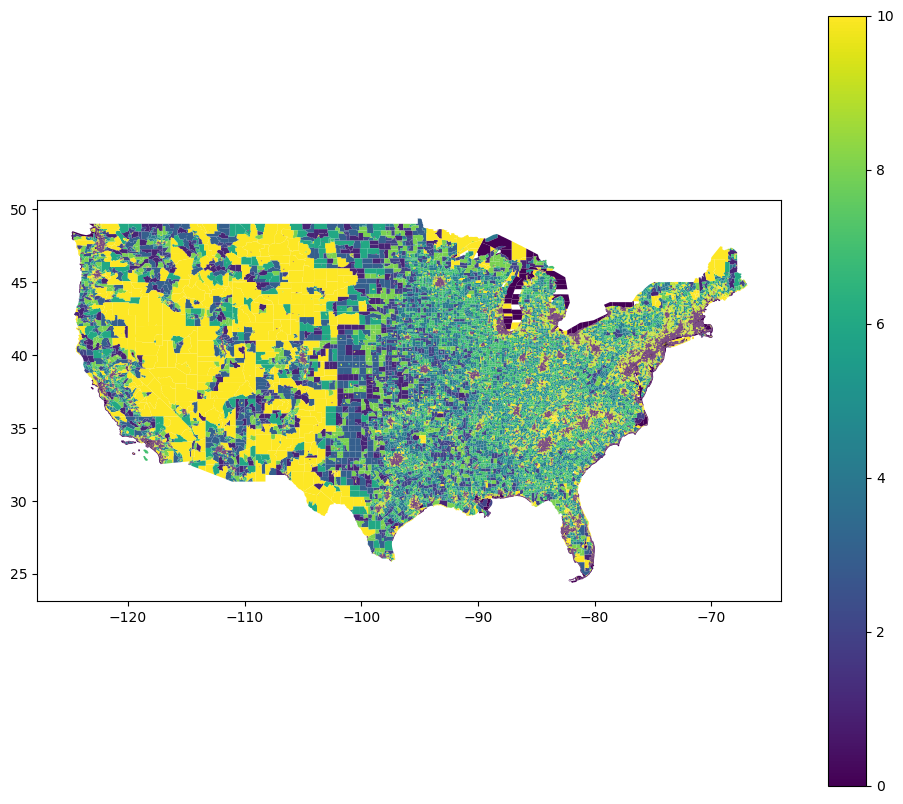

In [34]:
ct_alt.plot(column='cluster', figsize=(12, 10), legend = True)

In [35]:
# ct_alt.to_csv('ct/ct_alt.csv',index=False)

In [36]:
ct_alt.shape

(72456, 48)

In [37]:
# ct_alt_crs = ct_alt.to_crs(epsg=3857)
# places_all_crs = places_all.to_crs(epsg=3857)

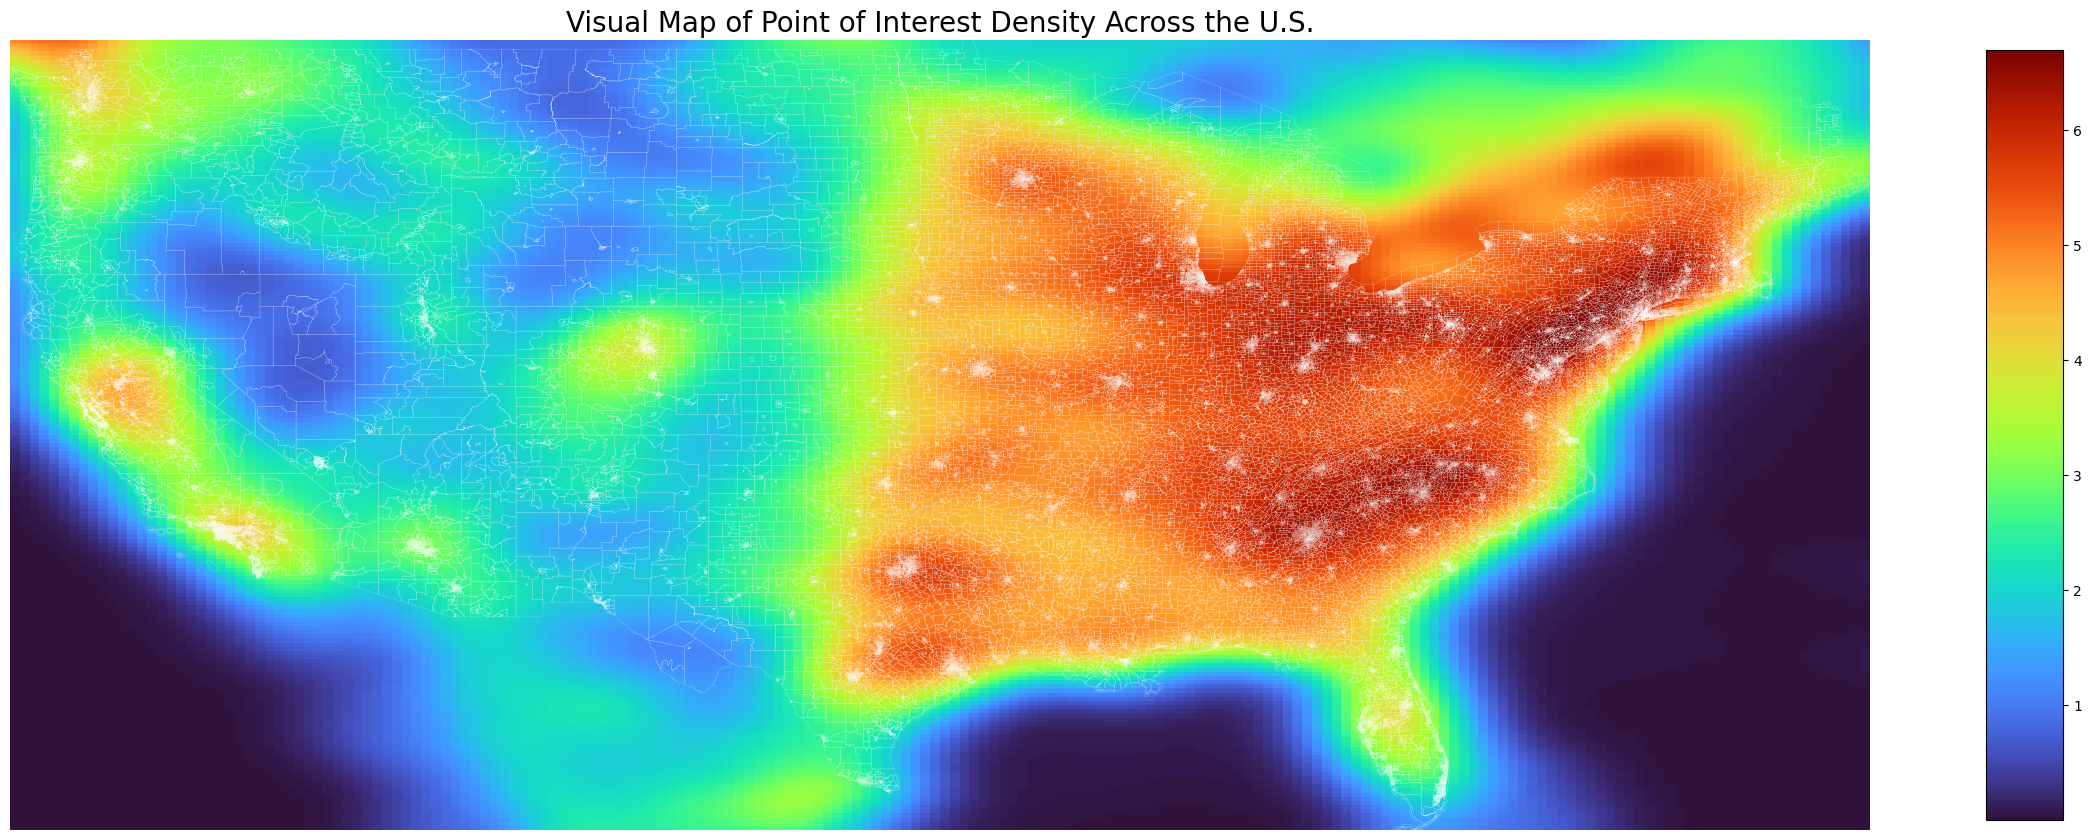

In [38]:
from scipy import ndimage
import numpy as np

def heatmap(d, bins=(500,500), smoothing=1.3, cmap='turbo',alpha=0.5,title='Visual Map of Point of Interest Density Across the U.S.'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.gaussian_filter(logheatmap, smoothing, mode='nearest')
    ct_alt.plot(color='none', edgecolor='white', linewidth=.2, alpha=.5, figsize=(30,20))

    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar(shrink=0.5, aspect=10)
    plt.title(title, fontsize=20)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()

heatmap(places_all, bins=190, smoothing=5,alpha=0.5,title='Visual Map of Point of Interest Density Across the U.S.')